In [3]:
using PyPlot, HDF5

In [4]:
path = "/Users/inchani/.julia/download/"
x1d_obs    = h5read(string(path,"data_set1.h5"), "x1d_obs");
fx1d_obs   = h5read(string(path,"data_set1.h5"), "fx1d_obs");

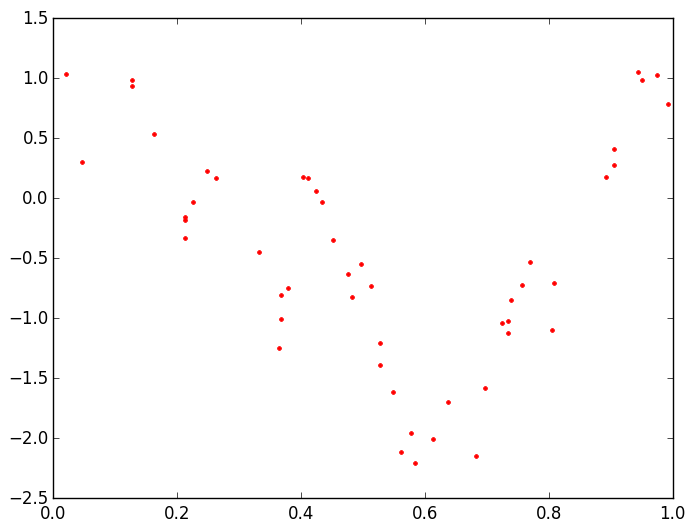

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a0a7490>

In [5]:
plot(x1d_obs, fx1d_obs, "r.", label="obs with noise")

In [2]:
cov1(x,y) = exp(-norm(x-y))
cov2(x,y) = (norm(x)^0.85 + norm(y).^0.85 - norm(x-y).^0.85)
function cov3(x,y)
    ν    = 1.2
    ρ    = 0.01
    σ²   = 1.0
    arg  = √(2ν/ρ) * norm(x-y)
    if arg == 0.0
        return σ²
    else
        rtn  = arg^ν
        rtn *= besselk(ν, arg)
        rtn *= σ² * 2^(1-ν) / gamma(ν)
        return rtn
    end
end


cov3 (generic function with 1 method)

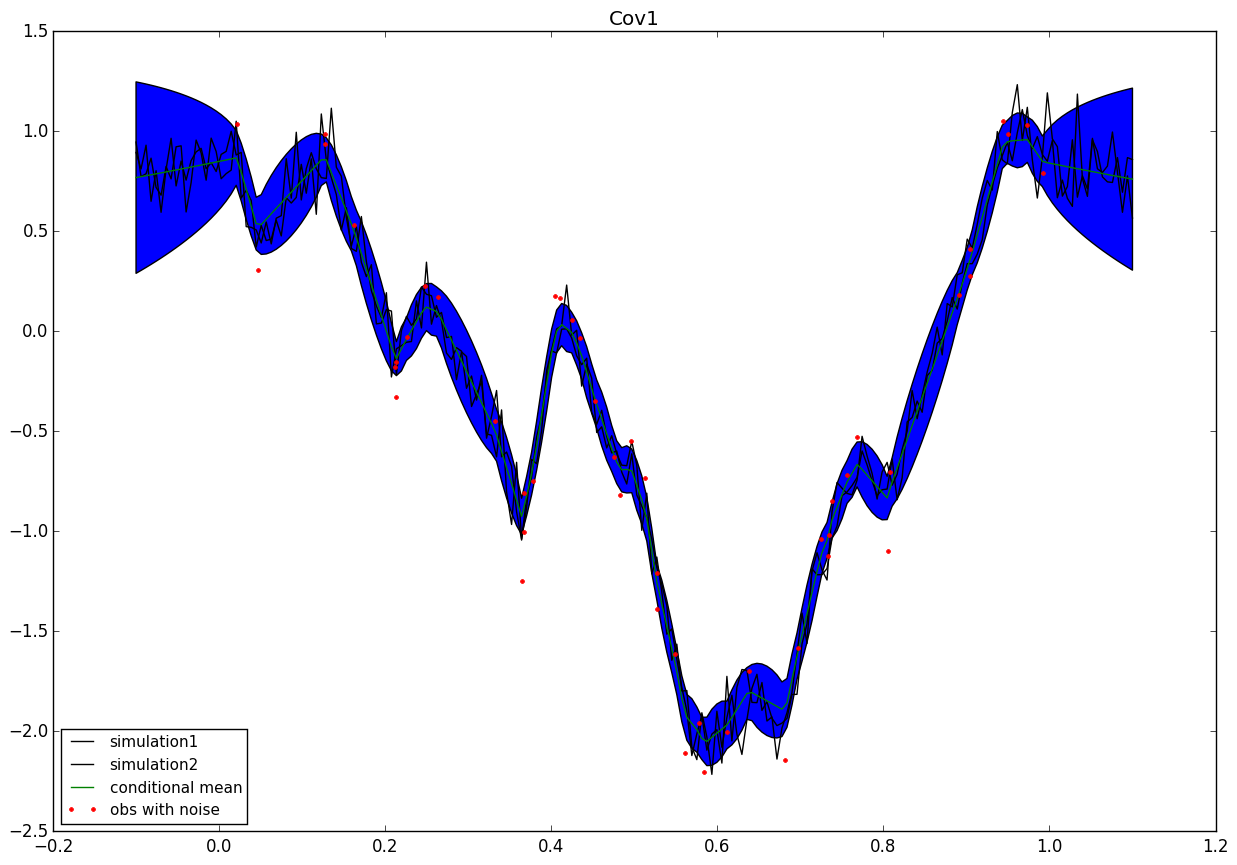

PyObject <matplotlib.legend.Legend object at 0x31a77e850>

/Users/inchani/python/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [7]:
dim = 200
x1d_pre    = linspace(-.1, 1.1, dim)
Σcross     = Float64[cov1(xi,yi) for xi in x1d_pre, yi in x1d_obs]
Σobs       = Float64[cov1(xi,yi) for xi in x1d_obs, yi in x1d_obs] + (0.15)^2 * eye(50)
Σpre       = Float64[cov1(xi,yi) for xi in x1d_pre, yi in x1d_pre]

fx_ept =  Σcross * inv(Σobs) * (fx1d_obs )
σ2 = Σpre  - Σcross * inv(Σobs) * transpose(Σcross)
σ = √ (σ2 .* eye(dim)) * ones(dim) 

PyPlot.figure(figsize=(15,10))

PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation1")
PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation2")
PyPlot.plot(x1d_pre, fx_ept, "g-", label="conditional mean")
PyPlot.plot(x1d_obs, fx1d_obs, "r.", label="obs with noise")
PyPlot.fill_between(x1d_pre, fx_ept-σ, fx_ept+σ, label="1σ region")
PyPlot.title("Cov1")
PyPlot.legend( loc=3,fontsize=11)

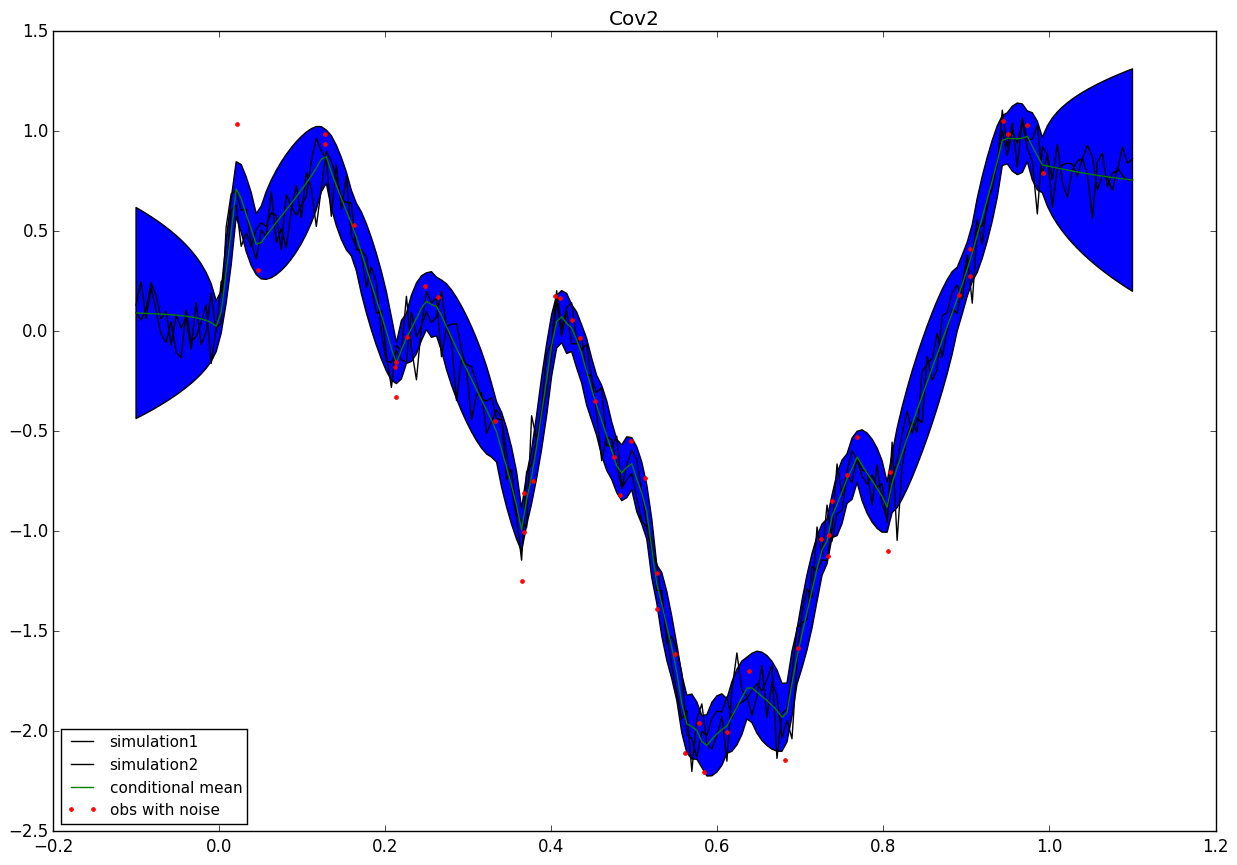

PyObject <matplotlib.legend.Legend object at 0x31a8b4f50>

In [8]:
dim = 200
x1d_pre    = linspace(-.1, 1.1, dim)
Σcross     = Float64[cov2(xi,yi) for xi in x1d_pre, yi in x1d_obs]
Σobs       = Float64[cov2(xi,yi) for xi in x1d_obs, yi in x1d_obs] + (0.15)^2 * eye(50)
Σpre       = Float64[cov2(xi,yi) for xi in x1d_pre, yi in x1d_pre]


fx_ept =  Σcross * inv(Σobs) * (fx1d_obs )
σ2 = Σpre  - Σcross * inv(Σobs) * transpose(Σcross)
σ = √ (σ2 .* eye(dim)) * ones(dim) 

PyPlot.figure(figsize=(15,10))

PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation1")
PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation2")
PyPlot.plot(x1d_pre, fx_ept, "g-", label="conditional mean")
PyPlot.plot(x1d_obs, fx1d_obs, "r.", label="obs with noise")
PyPlot.fill_between(x1d_pre, fx_ept-σ, fx_ept+σ, label="1σ region")
PyPlot.title("Cov2")
PyPlot.legend( loc=3,fontsize=11)

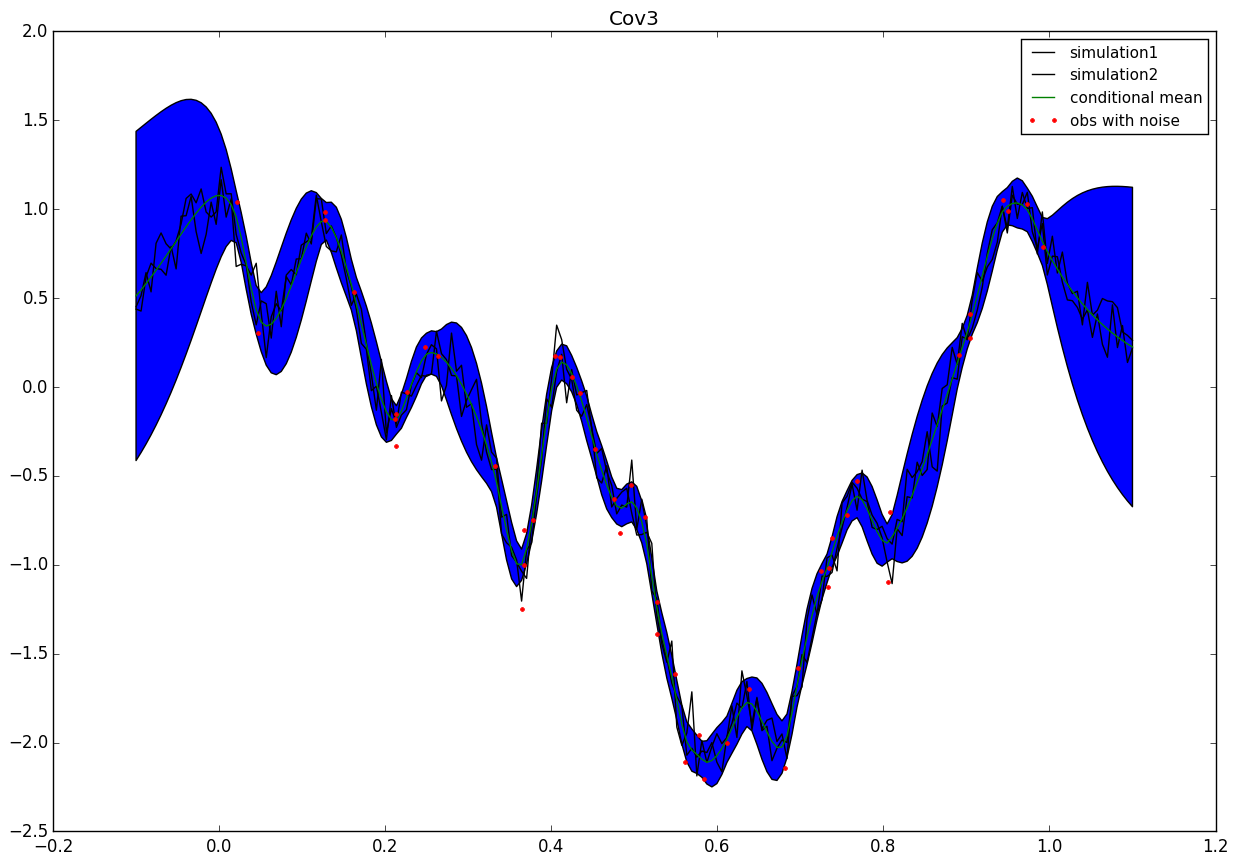

PyObject <matplotlib.legend.Legend object at 0x31e9dcf10>

In [9]:
dim = 200
x1d_pre    = linspace(-.1, 1.1, dim)
Σcross     = Float64[cov3(xi,yi) for xi in x1d_pre, yi in x1d_obs]
Σobs       = Float64[cov3(xi,yi) for xi in x1d_obs, yi in x1d_obs] + (0.15)^2 * eye(50)
Σpre       = Float64[cov3(xi,yi) for xi in x1d_pre, yi in x1d_pre]


fx_ept = Σcross * inv(Σobs) * fx1d_obs 

σ2 = Σpre  - Σcross * inv(Σobs) * transpose(Σcross)
σ = √ (σ2 .* eye(dim)) * ones(dim) 

PyPlot.figure(figsize=(15,10))

PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation1")
PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation2")
PyPlot.plot(x1d_pre, fx_ept, "g-", label="conditional mean")
PyPlot.plot(x1d_obs, fx1d_obs, "r.", label="obs with noise")
PyPlot.fill_between(x1d_pre, fx_ept-σ, fx_ept+σ, label="1σ region")
PyPlot.title("Cov3")
PyPlot.legend( loc=1,fontsize=11)

In [10]:
μexp =  mean(fx_ept)
Σcross     = Float64[cov3(xi,yi) for xi in x1d_pre, yi in x1d_obs]
Σobs       = Float64[cov3(xi,yi) for xi in x1d_obs, yi in x1d_obs] + (0.15)^2 * eye(50)
Σpre       = Float64[cov3(xi,yi) for xi in x1d_pre, yi in x1d_pre]


fx_ept =  Σcross * inv(Σobs) * (fx1d_obs)

Σ1       = Float64[cov1(xi,yi) for xi in x1d_obs, yi in x1d_obs]
Σ2       = Float64[cov2(xi,yi) for xi in x1d_obs, yi in x1d_obs]
Σ3       = Float64[cov3(xi,yi) for xi in x1d_obs, yi in x1d_obs]

for i=1:50
    Σ1[i,i] += (0.15)^2.
    Σ2[i,i] += (0.15)^2.
    Σ3[i,i] += (0.15)^2.
end


logP1 = -0.5 * transpose(fx1d_obs) * inv(Σ1) * (fx1d_obs)  - log(√((2π)^50.) * √(det(Σ1)))
logP2 = -0.5 * transpose(fx1d_obs) * inv(Σ2) * (fx1d_obs)  - log(√((2π)^50.) * √(det(Σ2)))
logP3 = -0.5 * transpose(fx1d_obs) * inv(Σ3) * (fx1d_obs)  - log(√((2π)^50.) * √(det(Σ3)))
logP1, logP2,  logP3

([-29.707627318382173],[-25.850224417710894],[-15.655649983839291])

In [57]:
# Therefore, cov3 has the maximum likelihood.